[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1fVAYKB3By0_dhVU1sVjhZ9zpktIC-YHu?usp=sharing)


In [ ]:
import pickle

In [ ]:
dir_path = './'

In [ ]:
def load_embeddings(file_name: str):
  with open(dir_path + file_name, 'rb') as f:
    embeddings_dict = pickle.load(f)

  return embeddings_dict

In [ ]:
embeddings_dict = load_embeddings('../embeddings/embeddings_poetry.pkl')

In [ ]:
POETS = list(embeddings_dict.keys())

In [ ]:
from tqdm import tqdm
from scipy.spatial.distance import cosine

In [ ]:
import torch
# from torch.nn.functional import cosine_simila
device = torch.device('cuda:0')

from torch.nn.functional import cosine_similarity

def avg_cosine_similarity(embeddings1, embeddings2):

    embeddings1 = torch.tensor(embeddings1).to(device)
    embeddings2 = torch.tensor(embeddings2).to(device)

    total_similarity = 0
    n = len(embeddings1)

    for emb1 in embeddings1:
        emb1 = emb1.unsqueeze(0)
        similarities = cosine_similarity(emb1, embeddings2)
        total_similarity += similarities.max().item()

    return total_similarity / n



similarity = {poet:{} for poet in POETS}
for poet in tqdm(POETS):
  for key in embeddings_dict[poet].keys():
    
    if key != 'real':
      similarity[poet][key] = avg_cosine_similarity(embeddings_dict[poet][key], embeddings_dict[poet]['real'])
      print()
      print(poet,key, similarity[poet][key])

  0%|                                                          | 0/5 [00:00<?, ?it/s]


Маяковский generated_large_O2M 0.7814773840348382

Маяковский generated_medium_O2M 0.7781434188167125

Маяковский generated_medium_O2O 0.8325608803367391

Маяковский generated_fp16 0.8238697458420523

Маяковский generated_fp32 0.8241636098107558

Маяковский generated 0.7513178553039419


 20%|█████████▊                                       | 1/5 [01:54<07:39, 114.98s/it]


Маяковский generated_ft 0.869152051846665

Тютчев generated_large_O2M 0.7501507568949062

Тютчев generated_medium_O2M 0.7512444909509118

Тютчев generated_medium_O2O 0.858628762463433

Тютчев generated_fp16 0.7574437760887275

Тютчев generated_fp32 0.75806445136989

Тютчев generated 0.6826579111250847


 40%|████████████████████                              | 2/5 [02:42<03:46, 75.56s/it]


Тютчев generated_ft 0.821495796041573

Блок generated_large_O2M 0.766702033820842

Блок generated_medium_O2M 0.7695503673603379

Блок generated_medium_O2O 0.8033397493037064

Блок generated_fp16 0.7606944701402878

Блок generated_fp32 0.7623244542517947

Блок generated 0.690365058566934


 60%|█████████████████████████████▍                   | 3/5 [06:41<04:59, 149.90s/it]


Блок generated_ft 0.8177603469221898

Есенин generated_large_O2M 0.756529532355513

Есенин generated_medium_O2M 0.7546071410669382

Есенин generated_medium_O2O 0.8301206784940385

Есенин generated_fp16 0.7628127175512932

Есенин generated_fp32 0.7647099798777417

Есенин generated 0.6733074070501829


 80%|███████████████████████████████████████▏         | 4/5 [08:02<02:02, 122.81s/it]


Есенин generated_ft 0.8825959921184593

Пушкин generated_large_O2M 0.75760083729742

Пушкин generated_medium_O2M 0.760723333702911

Пушкин generated_medium_O2O 0.8110028705226031

Пушкин generated_fp16 0.7657651356622075

Пушкин generated_fp32 0.7678201812735269

Пушкин generated 0.682556758815442


100%|█████████████████████████████████████████████████| 5/5 [11:34<00:00, 138.90s/it]


Пушкин generated_ft 0.8293328002108001


In [ ]:
import pickle

In [ ]:
with open('./similarity.pkl', 'wb') as f:
  pickle.dump(similarity, f)

In [ ]:
import pandas as pd
pd.DataFrame(similarity).round(3)

,Маяковский,Тютчев,Блок,Есенин,Пушкин
generated_large_O2M,0.781,0.750,0.767,0.757,0.758
generated_medium_O2M,0.778,0.751,0.770,0.755,0.761
generated_medium_O2O,0.833,0.859,0.803,0.830,0.811
generated_fp16,0.824,0.757,0.761,0.763,0.766
generated_fp32,0.824,0.758,0.762,0.765,0.768
generated,0.751,0.683,0.690,0.673,0.683
generated_ft,0.869,0.821,0.818,0.883,0.829


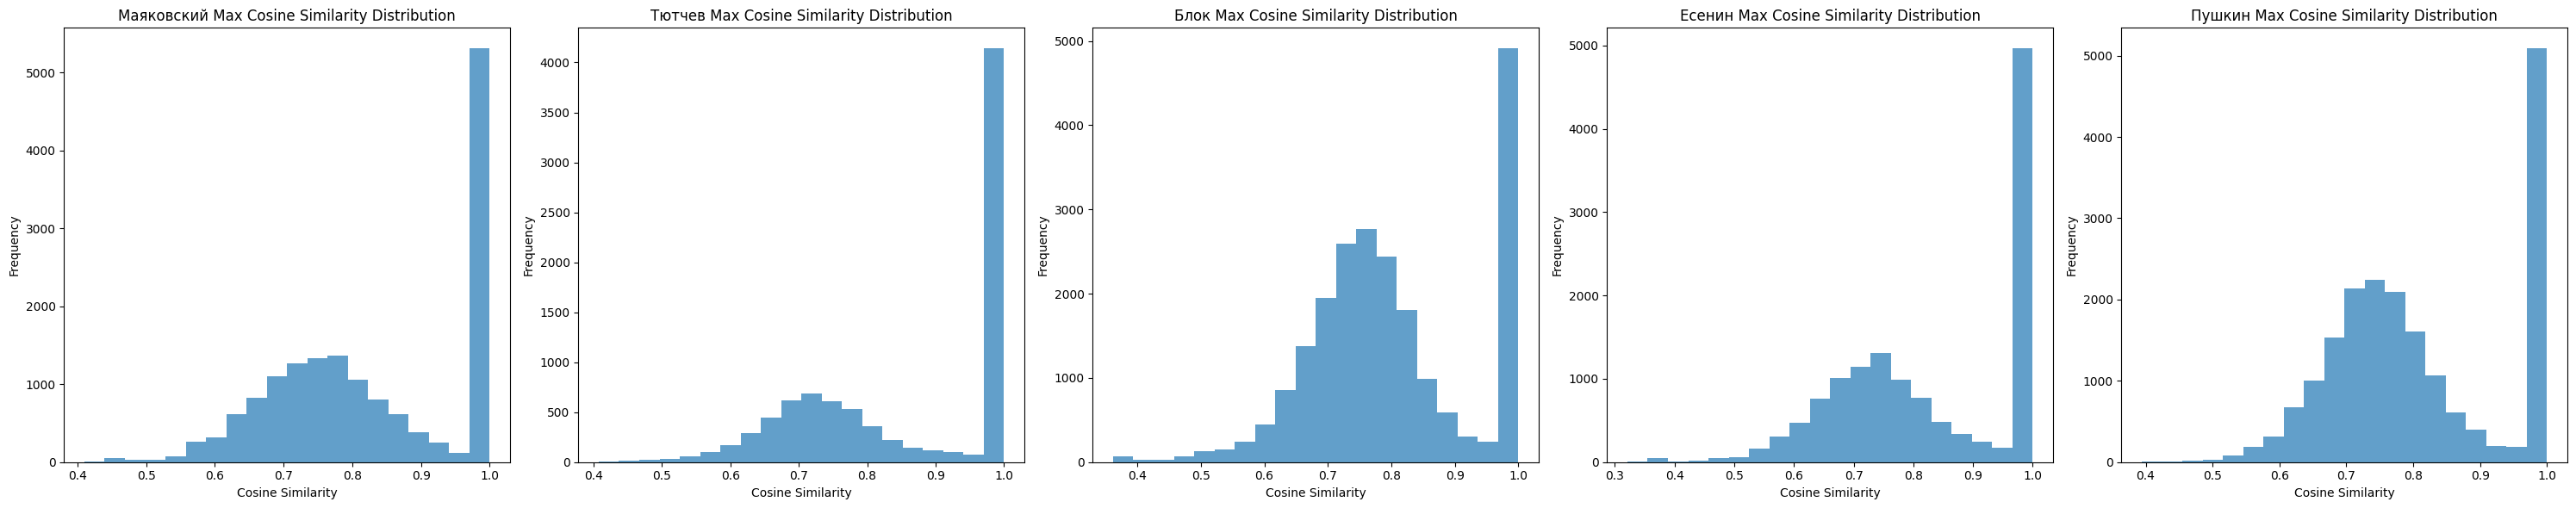

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

fig, axs = plt.subplots(1, 5, figsize=(30, 6))

for i, (poet, embeddings) in enumerate(embeddings_dict.items()):
    real_embeddings = embeddings['real']
    generated_embeddings = embeddings['generated_medium_O2O']

    # Compute pairwise cosine similarity
    similarity_matrix = 1 - cdist(real_embeddings, generated_embeddings, metric='cosine')

    # Get the maximum similarity for each generated poem
    max_similarities = np.max(similarity_matrix, axis=0)

    # Plot histogram on the ith subplot
    axs[i].hist(max_similarities, bins=20, alpha=0.7)
    axs[i].set_title(f'{poet.capitalize()} Max Cosine Similarity Distribution')
    axs[i].set_xlabel('Cosine Similarity')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
